In [1]:
import pandas as pd 
import numpy as np
import json

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

import descriptors.preprocessing as pp
import descriptors.dft_featurisation as dft_ft
import descriptors.rdkit_featurisation as rdkit_ft
from analysis import analysis_train_set_size, random_split, stratified_split 

from rdkit import Chem
from rdkit.Chem import Draw

In [2]:
estimators = [('predictor', RandomForestRegressor())]
pipe = Pipeline(estimators)
metric = r2_score

In [8]:
df_dft = pd.read_csv("data/NiCOlit.csv", sep = ',')
df_dft = pp.preprocess(df_dft)
indexes_kept_dft = np.array(df_dft.index)
X_dft, y_dft, DOI_dft, mechanisms_dft, origins_dft, sub_dft, lig_dft = dft_ft.process_dataframe_dft(df_dft, data_path="data/utils/", origin=False)

In [15]:
# TODO: clean 
r2 = []
length = []
for sub in np.unique(sub_dft):
    indexes = np.where(sub_dft==sub)[0]
    values, baseline_values, model_values, stratification_values, additional_stratification_values = random_split(X_dft[indexes, :], y_dft[indexes], origins_dft[indexes], sub_dft[indexes], n_iterations=100)
    print(sub, len(indexes), round(r2_score(values, model_values), 3))
    r2.append(round(r2_score(values, model_values), 3))
    length.append(len(indexes))

OAc 72 0.412
OC(=O)N 215 0.35
OC(=O)O 82 0.641
OCH3 546 0.568
OCOC 17 -0.38
OPh 3 -1.32
OPiv 394 0.554
OSi(C)(C)C 23 -0.257
Otriazine 54 0.391


In [16]:
R2_scores_full = []
for sub in np.unique(mechanisms_dft):
    indexes = np.where(mechanisms_dft==sub)[0]
    values, baseline_values, model_values, stratification_values, additional_stratification_values = random_split(X_dft[indexes, :], y_dft[indexes], origins_dft[indexes], mechanisms_dft[indexes], n_iterations=100)
    print(sub, len(indexes), round(r2_score(values, model_values), 3))
    R2_scores_full.append(round(r2_score(values, model_values),3))

Al 53 0.172
B 472 0.447
C-H 271 0.555
CO2 87 0.499
Li 52 0.045
NCO 57 0.298
NH 27 -0.039
RMgX 266 0.473
Si 53 0.59
Zn 68 0.57


In [17]:
R2_scores_full = []
for sub in np.unique(DOI_dft):
    indexes = np.where(DOI_dft==sub)[0]
    values, baseline_values, model_values, stratification_values, additional_stratification_values = random_split(X_dft[indexes, :], y_dft[indexes], origins_dft[indexes], DOI_dft[indexes], n_iterations=100)
    print(sub, len(indexes), round(r2_score(values, model_values), 3))
    R2_scores_full.append(round(r2_score(values, model_values),3))

Thèse 46 0.161
https://doi.org/10.1002/adsc.201600590 53 0.586
https://doi.org/10.1002/anie.200453765 59 0.637
https://doi.org/10.1002/anie.200907287 27 -0.038
https://doi.org/10.1002/anie.201403823 76 0.669
https://doi.org/10.1002/chem.201003731 55 0.471
https://doi.org/10.1002/chem.201103784 54 0.659
https://doi.org/10.1002/chem.201603436 66 0.101
https://doi.org/10.1002/ejic.201900692 84 0.467
https://doi.org/10.1021/acs.joc.6b01627 21 0.029
https://doi.org/10.1021/acs.organomet.9b00543 53 0.181
https://doi.org/10.1021/acs.orglett.6b02656 36 0.128
https://doi.org/10.1021/acscatal.7b01058 53 0.173
https://doi.org/10.1021/acscatal.8b03436 152 0.623
https://doi.org/10.1021/ja410883p 87 0.497
https://doi.org/10.1021/ja412107b 50 0.225
https://doi.org/10.1021/ja5029793 57 0.29
https://doi.org/10.1021/ja8056503 79 0.401
https://doi.org/10.1021/ja907700e 27 0.039
https://doi.org/10.1021/jo1024464 23 -0.059
https://doi.org/10.1021/jo4005537 57 0.32
https://doi.org/10.1021/ol101592r 27 0.311

In [24]:
print(np.unique(sub_dft))
print(r2)
print(R2_scores_full)

['OAc' 'OC(=O)N' 'OC(=O)O' 'OCH3' 'OCOC' 'OPh' 'OPiv' 'OSi(C)(C)C'
 'Otriazine']
[0.404, 0.345, 0.64, 0.569, -0.391, -1.336, 0.556, -0.254, 0.391]
[0.356, 0.408, 0.663, 0.554, 0.063, -0.3, 0.55, -0.254, 0.413]


In [33]:
df_dft['substrate_class'] = sub_dft
for sub in np.unique(sub_dft):
    indexes = np.where(sub_dft==sub)[0]
    print(sub, ":\n","DOIs:", len(np.unique(DOI_dft[indexes])),
                                       "\n A-X:", len(np.unique(mechanisms_dft[indexes])),
         ":\n","n_reactions:", len(np.where(df_dft.substrate_class==sub)[0]))
    
for sub in np.unique(sub_dft):
    indexes = np.where(sub_dft==sub)[0]
    

OAc :
 DOIs: 7 
 A-X: 5 :
 n_reactions: 72
OC(=O)N :
 DOIs: 14 
 A-X: 8 :
 n_reactions: 215
OC(=O)O :
 DOIs: 4 
 A-X: 2 :
 n_reactions: 82
OCH3 :
 DOIs: 11 
 A-X: 6 :
 n_reactions: 546
OCOC :
 DOIs: 4 
 A-X: 2 :
 n_reactions: 17
OPh :
 DOIs: 3 
 A-X: 3 :
 n_reactions: 3
OPiv :
 DOIs: 12 
 A-X: 7 :
 n_reactions: 394
OSi(C)(C)C :
 DOIs: 5 
 A-X: 3 :
 n_reactions: 23
Otriazine :
 DOIs: 1 
 A-X: 1 :
 n_reactions: 54


In [48]:
df_dft['substrate_class'] = sub_dft

for sub in np.unique(df_dft.substrate_class):
    sub_df = df_dft[df_dft['substrate_class']==sub]
    n_sub = len(sub_df.substrate.unique())
    n_cp = len(sub_df.effective_coupling_partner.unique())
    n_lig = len(sub_df.effective_ligand.unique())
    n_reag = len(sub_df.effective_reagents.unique())
    n_sol = len(sub_df.solvent.unique())
    n_prec = len(sub_df.catalyst_precursor.unique())
    print(sub, ":", "{:e}".format(n_sub*n_cp*n_lig*n_reag*n_sol*n_prec))

OAc : 4.193280e+06
OC(=O)N : 1.434921e+08
OC(=O)O : 4.490640e+05
OCH3 : 5.397859e+09
OCOC : 3.240000e+03
OPh : 4.860000e+02
OPiv : 3.198075e+09
OSi(C)(C)C : 9.600000e+03
Otriazine : 1.815000e+05


In [6]:
for sub in np.unique(sub_dft):
    indexes = np.where(sub_dft==sub)[0]
    smis = np.unique(df_dft.substrate[indexes])
    img  = Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in smis[:6]], 
                            maxMols=500, useSVG=True,
                                molsPerRow=3)
    filename = str('sub_' + str(sub) + '.svg')
    with open(filename, 'w') as f:
        f.write(img.data)

In [106]:
sub = 'OC(=O)N'
indexes = np.where(sub_dft==sub)[0]
smis = np.unique(df_dft.substrate[indexes])
print(len(smis))


57


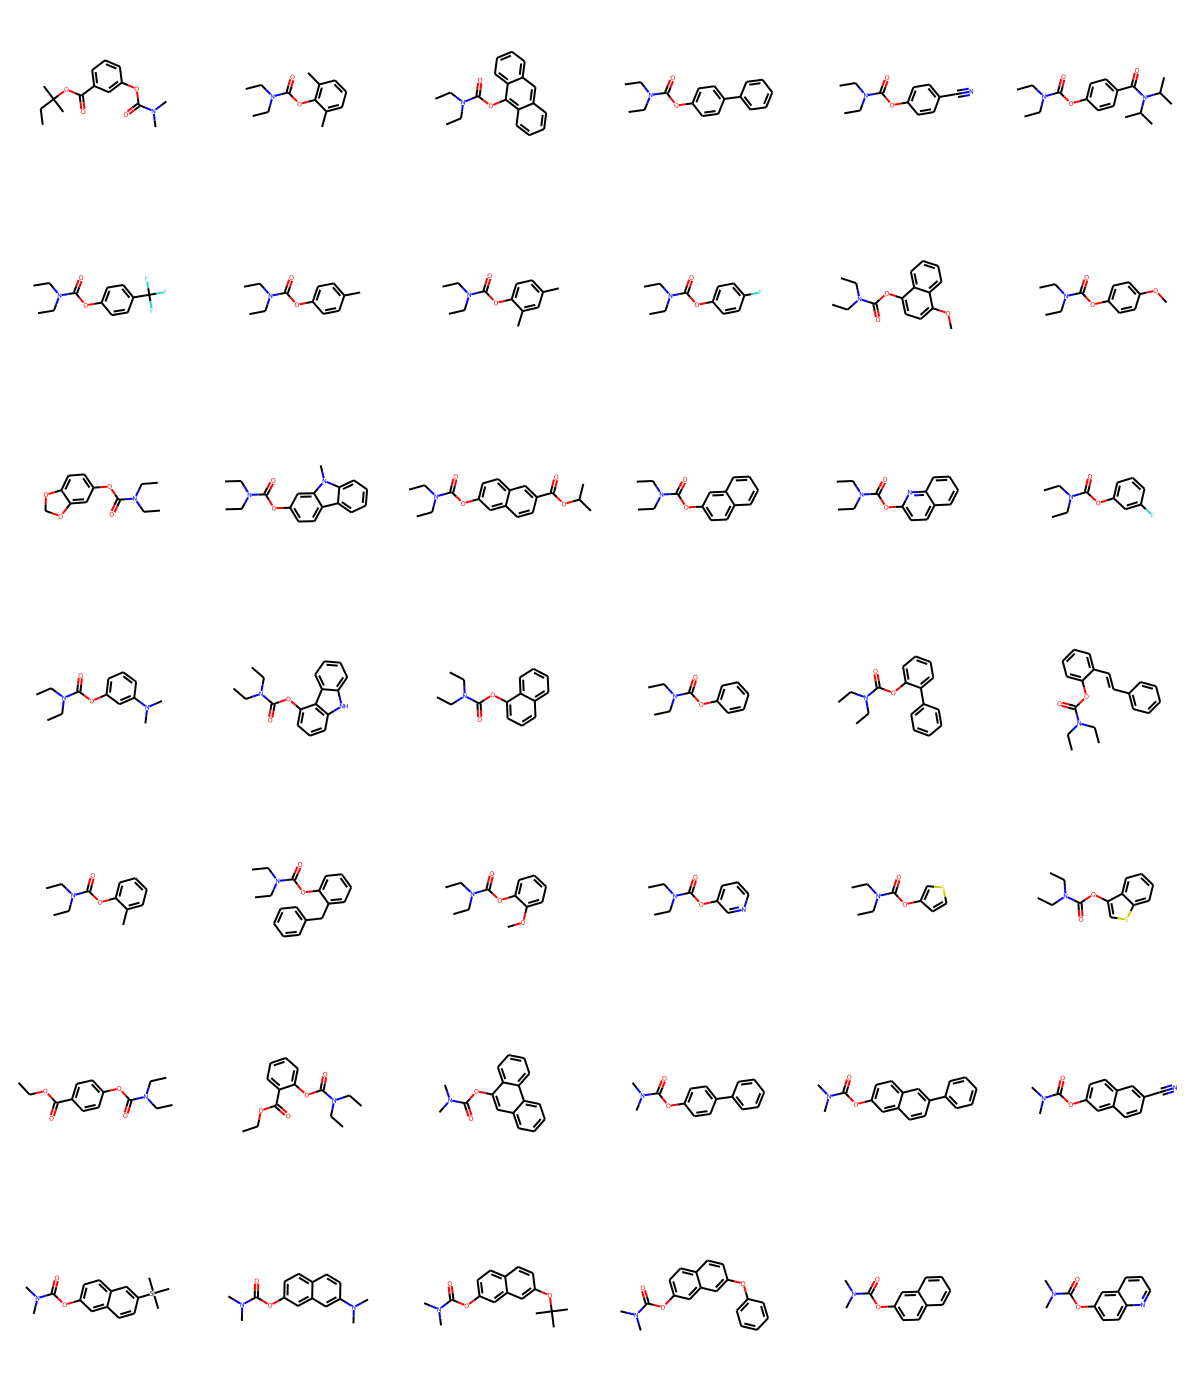

In [109]:
smis_under48 = smis[:42]
img  = Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in smis_under48], 
                            maxMols=500, useSVG=True,
                                molsPerRow=6)
filename = str('sub_' + str(sub) + '1.svg')
with open(filename, 'w') as f:
    f.write(img.data)
    
img

In [7]:
for cp in np.unique(mechanisms_dft):
    indexes = np.where(mechanisms_dft==cp)[0]
    smis = np.unique(df_dft.coupling_partner[indexes])
    img  = Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in smis[:6]], 
                            maxMols=500, useSVG=True,
                                molsPerRow=3)
    filename = str('cp_' + str(cp) + '.svg')
    with open(filename, 'w') as f:
        f.write(img.data)

In [113]:
cp = 'C-H'
indexes = np.where(mechanisms_dft==cp)[0]
smis = np.unique(df_dft.coupling_partner[indexes])
print(len(smis))


51


In [116]:
smis_under48 = smis[:42]
img  = Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in smis_under48], 
                            maxMols=500, useSVG=True,
                                molsPerRow=6)
filename = str('cp_' + str(cp) + '1.svg')
with open(filename, 'w') as f:
    f.write(img.data)

In [82]:
np.unique(mechanisms_dft)

array(['Al', 'B', 'C-H', 'CO2', 'Li', 'NCO', 'NH', 'RMgX', 'Si', 'Zn'],
      dtype='<U4')

In [83]:
np.unique(sub_dft)


array(['OAc', 'OC(=O)N', 'OC(=O)O', 'OCH3', 'OCOC', 'OPh', 'OPiv',
       'OSi(C)(C)C', 'Otriazine'], dtype=object)

In [76]:
from rdkit.Chem import Draw
from rdkit import Chem
img  = Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in smis], 
                            maxMols=500, useSVG=True,
                            molsPerRow=6)



In [16]:
DOIs = np.unique(df_dft.DOI[indexes])
DOIs

array(['https://doi.org/10.1002/anie.200453765',
       'https://doi.org/10.1002/chem.201003731',
       'https://doi.org/10.1002/chem.201603436',
       'https://doi.org/10.1021/acs.orglett.6b02656',
       'https://doi.org/10.1039/B718998B'], dtype=object)

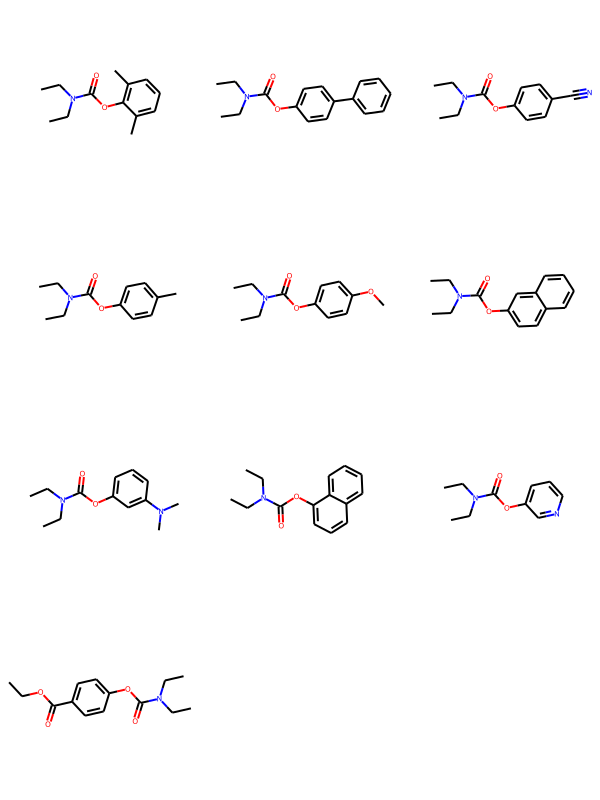

In [15]:
doi = 'https://doi.org/10.1021/jo1024464'
dois_indexes = np.where(df_dft.DOI == doi)[0]
smis = np.unique(df_dft.substrate[dois_indexes])
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in smis])